In [2]:
#!pip install seaborn numpy matplotlib phonopy phono3py
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k"})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0,
                            "font.family":"Helvetica", "axes.labelsize":24.,"xtick.labelsize":24.,
                            "ytick.labelsize":24., "legend.fontsize":20.})

colors = sns.color_palette("colorblind", 12)



Text(0.5, 1.0, 'KPTS Optimization')

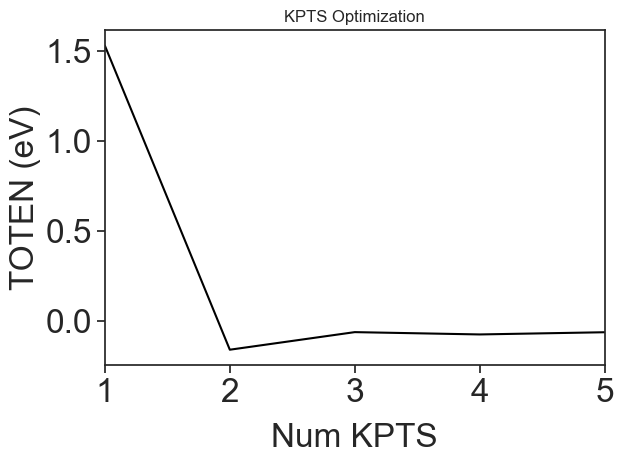

In [3]:
# Plot KPTS Optimization, 3x3x3 looks ok
# 1,2,3,4,5,
# 1st iter (wrong IBRION) 3.97425098,-0.11646243,-0.05045030,-0.06080354,-0.06080357
# 2nd iter 1.53014443,-0.15777508,-0.06018758,-0.07302824,
KPTS = [1,2,3,4,5] # num KPTS in test, should be 8 tests to plot
TOTEN_KPTS = [1.53014443,-0.15777508,-0.06018758,-0.07302824,-0.06080357] # eV
plt.plot(KPTS,TOTEN_KPTS, color='k') 
plt.xlim(1,5)
#plt.ylim(-123.34528209,-123.39989459)
plt.xlabel('Num KPTS', labelpad = 10)
plt.ylabel('TOTEN (eV)', labelpad = 3)
plt.title('KPTS Optimization')

In [4]:
# This function determines the k-path length for band structures ######################
# kpoints : a list of the k-points sampled on the k-path. The k-vectors will be determined from this
# POSCAR : the path to the POSCAR file type for this band structure. The simulation cell is taken from this file.
def k_path_dft(kpoints, POSCAR): # poscar is path to output file (./POSCAR)
    kvectors = []
    for i in range(0,len(kpoints)-1):
        vector = [kpoints[i+1][0]-kpoints[i][0], kpoints[i+1][1]-kpoints[i][1], kpoints[i+1][2]-kpoints[i][2]]
        kvectors.append(vector)
   
    simulation_cell = pd.read_csv(POSCAR, header=None, delim_whitespace=True, skiprows=[0,1], nrows=3)
   
    klength = []
    for i in range(0,len(kvectors)): # norm of dot prod of kpoints (to change scale)
        distance = np.linalg.norm(np.dot(kvectors[i], simulation_cell))
        klength.append(np.pi/distance)
       
    kpath = np.linspace(0, np.sum(klength), 600) # num is total num of kpoints (100 per vector)
    return kpath

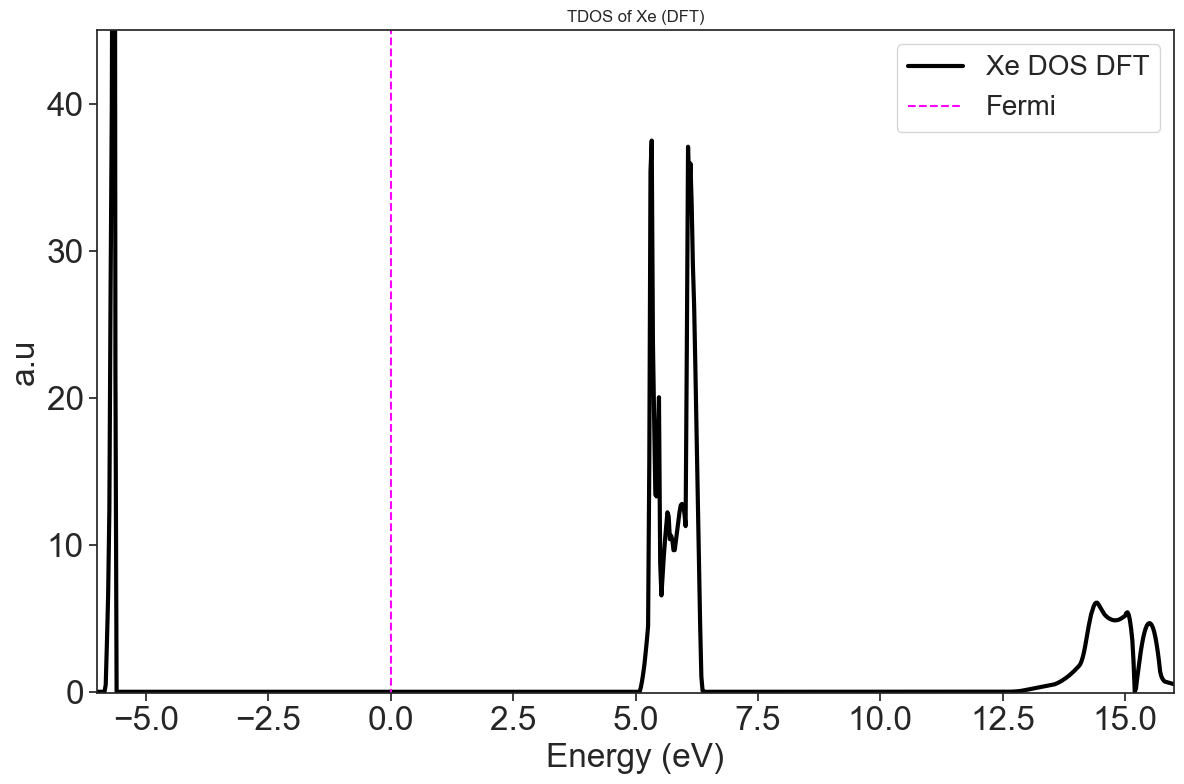

In [5]:
# density of state
# get vals
TDOS = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/TDOS.dat'))
fermi = -6.381170
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOS[:,0]-fermi, TDOS[:,1], color='k',lw=3, label='Xe DOS DFT')
plt.vlines(0,-10,110,color='magenta',linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u')
plt.xlim(-6,16)
plt.ylim(-0.1,45)
plt.legend()
plt.title('TDOS of Xe (DFT)')
plt.savefig('Xe-DOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

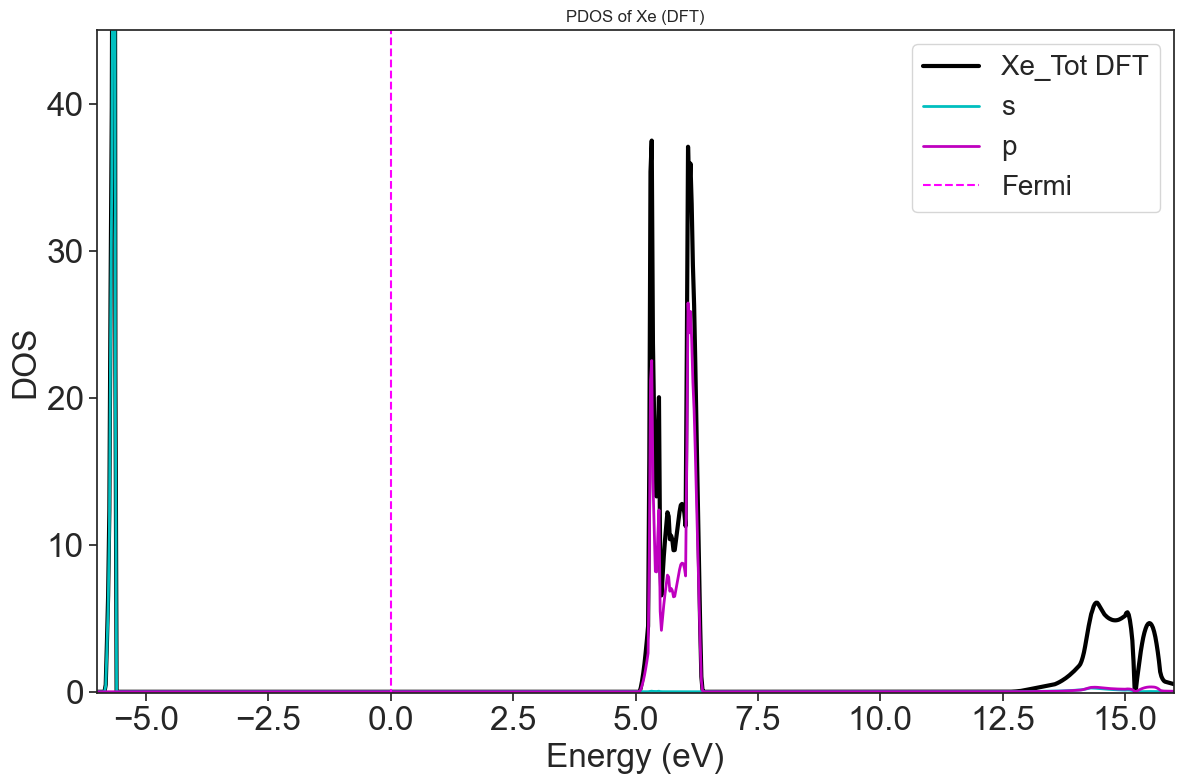

In [6]:
# partial density of state
# get vals
PDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/PDOS_Xe.dat'))
TDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/TDOS.dat'))
fermiDFT = -6.381170
# plot PDOS
fig1 = plt.figure(figsize=(12,8))
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe_Tot DFT')
plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,1], color='c',lw=2, label='s')
plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,2]+PDOSDFT[:,3]+PDOSDFT[:,4], color='m',lw=2, label='p')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,3], color='orange',lw=2, label='pz')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,4], color='r',lw=2, label='px')
plt.vlines(fermiDFT-fermiDFT,-10,110,color='magenta',linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.xlim(-6,16)
plt.ylim(-0.1,45)
plt.legend()
plt.title('PDOS of Xe (DFT)')
plt.savefig('Xe-PDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


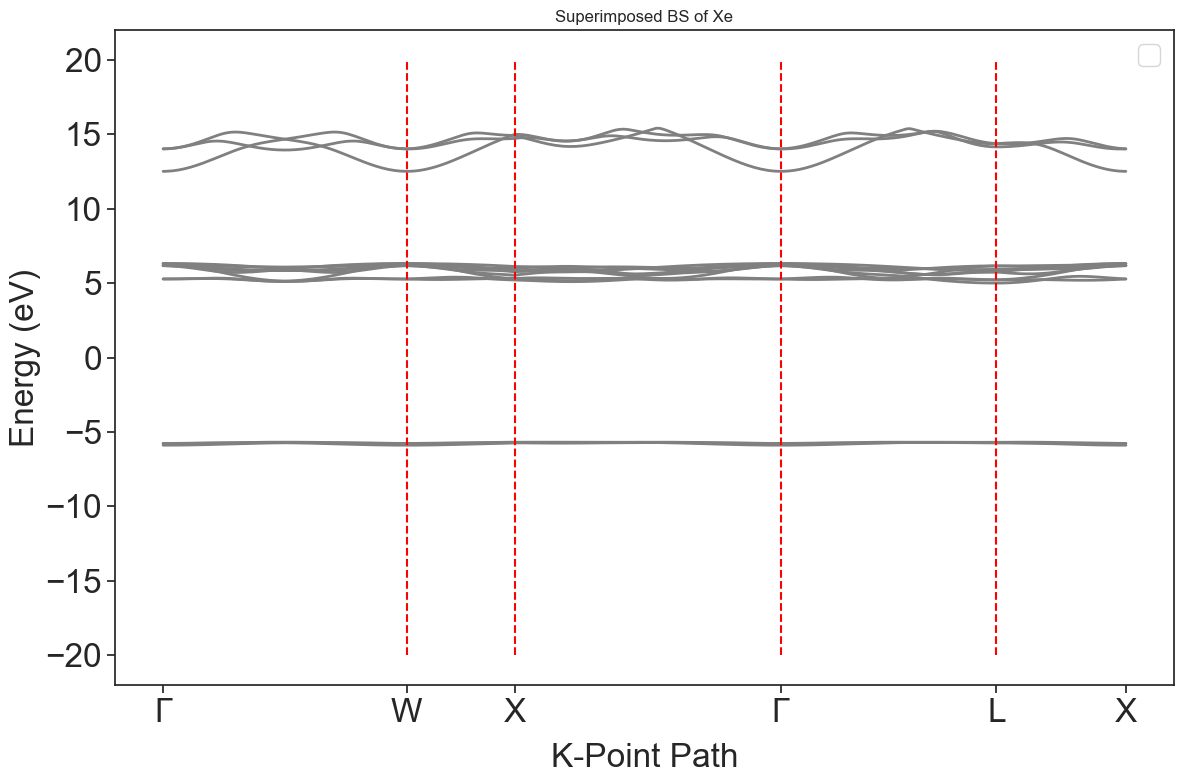

In [7]:
# band structure
# 
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

fermi = -6.381170 # Band gap as variable,  not necessary
Bands_Xe_DFT = np.array(np.loadtxt("C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-improved/REFORMATTED_BAND.dat")) # update this ho
KPATH_Xe_DFT = k_path_dft(KPOINTS, "C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-improved/POSCAR") # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############3
#print('shape', np.shape(Bands_Xe_DFT))
#print(KPATH_Xe_DFT)

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
plt.plot(Bands_Xe_DFT[:,0], Bands_Xe_DFT[:,1:-1]-fermiDFT, color='grey', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
kpts=[Bands_Xe_DFT[0,0],Bands_Xe_DFT[79,0],Bands_Xe_DFT[159,0],Bands_Xe_DFT[239,0],Bands_Xe_DFT[319,0],Bands_Xe_DFT[399,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='red',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
#plt.xlim(1,Bands_Xe_DFT[-1,0])
#plt.ylim(-0,30)
plt.legend()
plt.title('Superimposed BS of Xe')
################### v DOS plot
#plt.subplot(122)
#plt.plot(DOS_AA_DFT[:,1]/5, DOS_AA_DFT[:,0]-(BandGap_AA_DFT/2), color='purple')
#plt.text(2, -0.25, f'{COF_AA}-DFT = {BandGap_AA_DFT} eV', color='purple', fontsize=16)
#plt.xlabel('DOS', labelpad=10)
#plt.ylim(-2,2)
#plt.xlim(0,60)
#plt.hlines(ConductionBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')
#plt.hlines(ValenceBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')

plt.savefig('Xe-B-S-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

# to plot in reciprocal space go up to end of first vector, then add last term of first vector to all of second vector, then last term of second vector to third
#
#


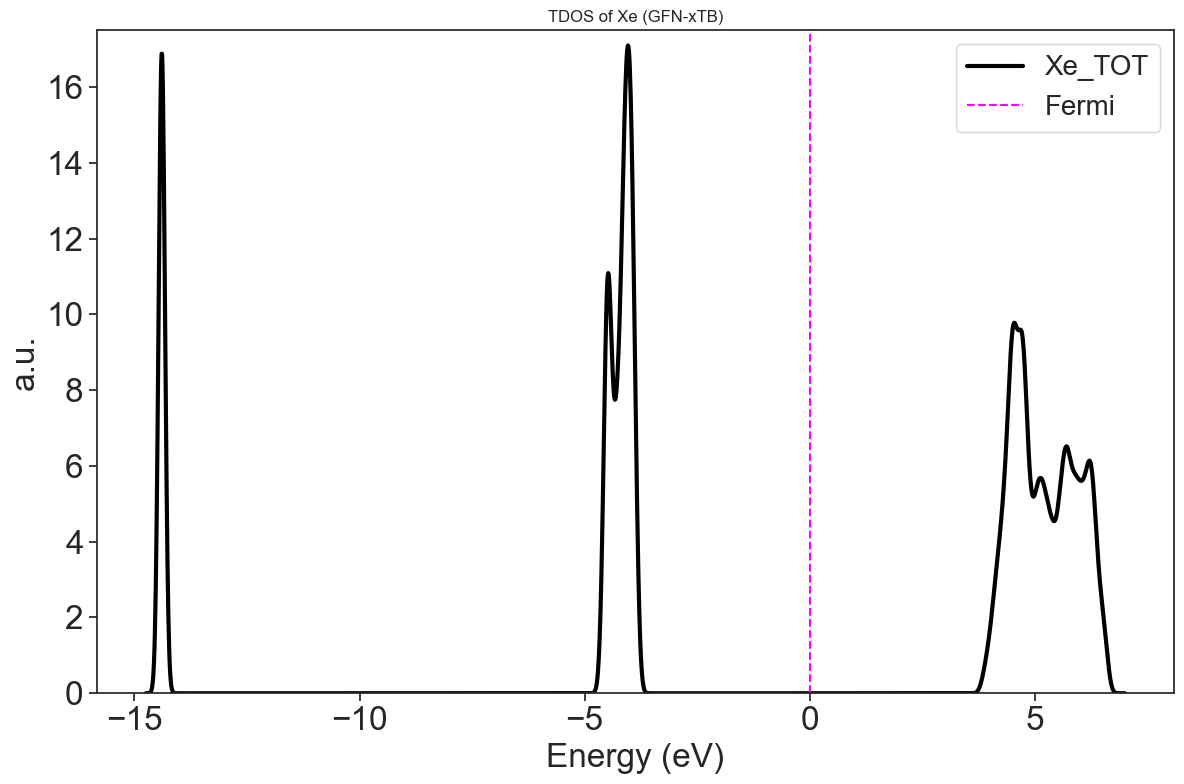

In [8]:
# C:\Users\alley\Desktop\Research\Xe\5-MD\DOS
# density of state Xe using GFN-xTB
# get vals
TDOS = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/5-MD/DOS/dos_tot.dat'))
fermi = -7.6137 #eV 
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOS[:,0]-fermi, TDOS[:,1], color='k',lw=3, label='Xe_TOT')
#plt.plot(TDOS[:,0], TDOS[:,2], color='grey',lw=2, label='UO2_TOT_DW') # not necessary because UO2 is a semiconductor (not magnetic, symmetrical)
plt.vlines(fermi-fermi,0,20,color='magenta',linestyle='dashed', label='Fermi') # fermi NOT SHIFTED
#plt.xlim(-8,6) # fermi NOT SHIFTED

plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(-0,17.5)
plt.legend()
plt.title('TDOS of Xe (GFN-xTB)')
#plt.savefig('Xe-DOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

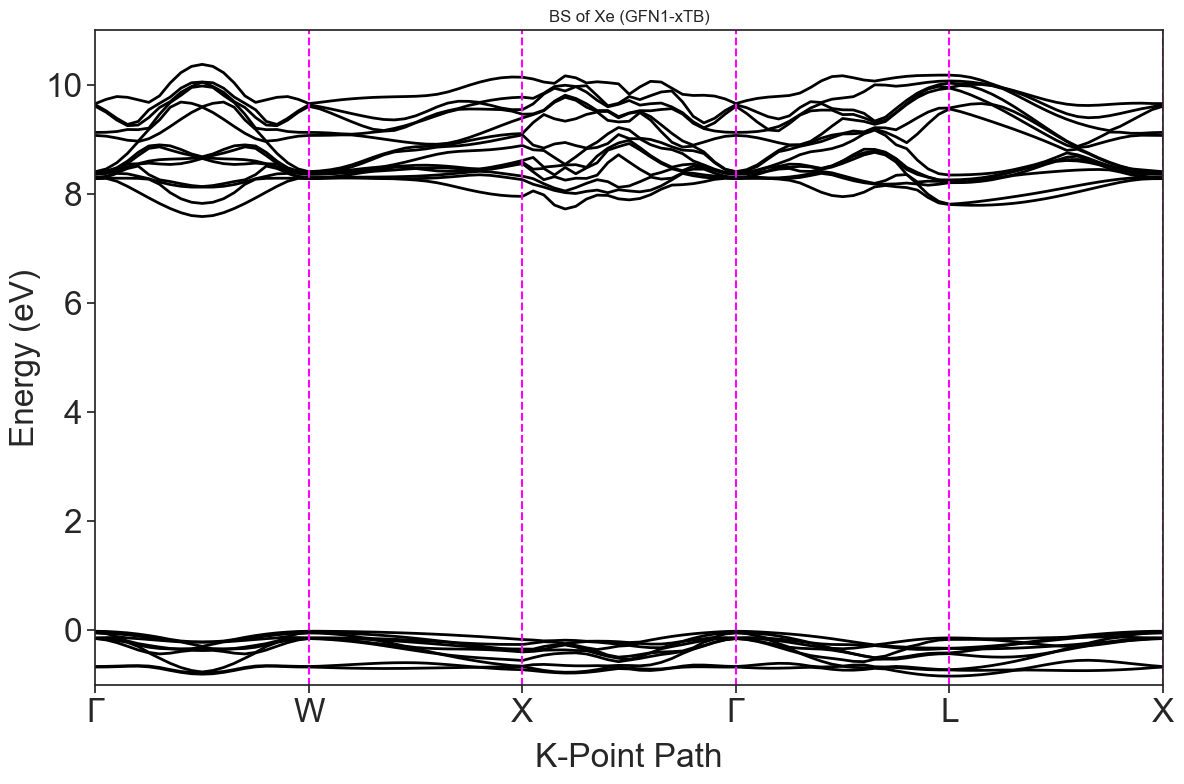

In [9]:
# band structure
# GFN
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

fermi = 0 # Band gap as variable,  not necessary
Bands_Xe_GFN1 = np.array(np.loadtxt("C:/Users/alley/Desktop/Research/Xe/5-MD/BS/bands_tot.dat")) # update this ho
KPATH_Xe_GFN1 = k_path_dft(KPOINTS, "C:/Users/alley/Desktop/Research/Xe/5-MD/BS/POSCAR") # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############3
#print('shape', np.shape(Bands_Xe_DFT))
#print(KPATH_Xe_DFT)

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
plt.title('BS of Xe (GFN1-xTB)')
plt.plot(Bands_Xe_GFN1[:,0], Bands_Xe_GFN1[:,1:-1]+11.4, color='k', lw=2) # use first column of reformatted bands to be x vals 
plt.xlim(1,Bands_Xe_GFN1[-1,0])
plt.ylim(-1,11)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
# location of kpts from dataset
kpts=[Bands_Xe_GFN1[0,0],Bands_Xe_GFN1[20,0],Bands_Xe_GFN1[40,0],Bands_Xe_GFN1[60,0],Bands_Xe_GFN1[80,0],Bands_Xe_GFN1[100,0]]
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:6],-18,18,color='magenta',linestyle='dashed')

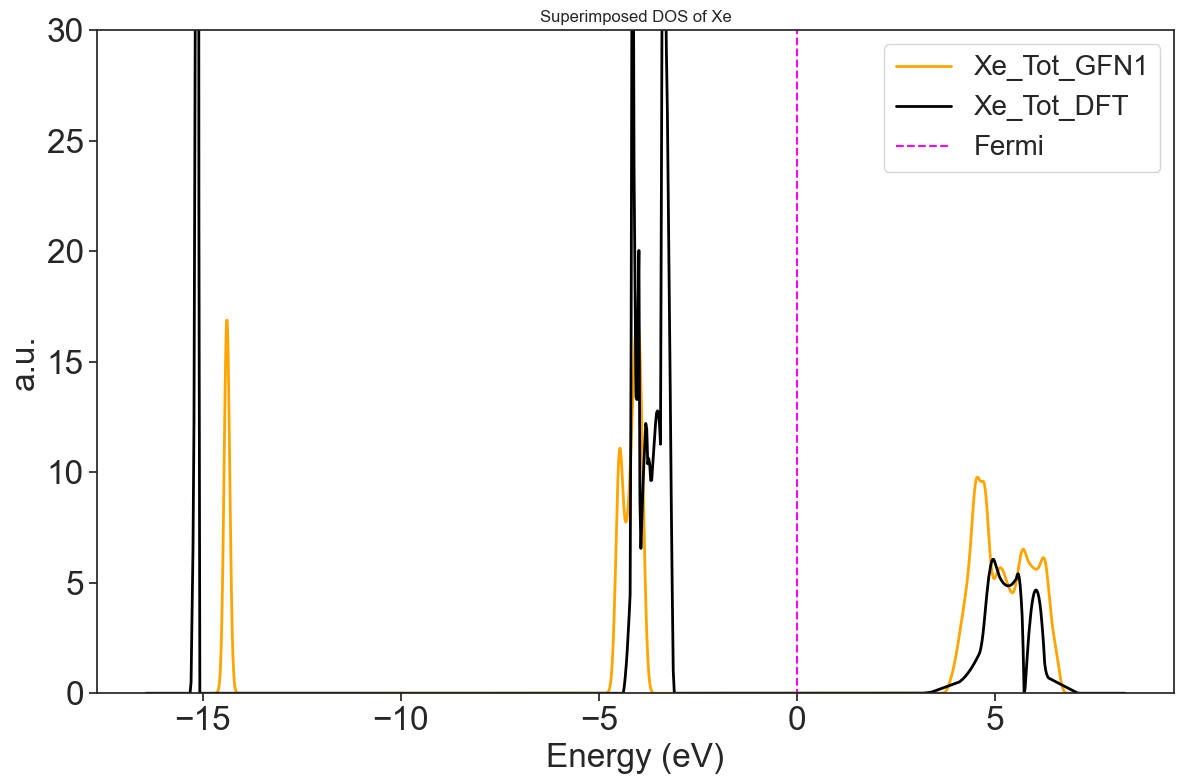

In [36]:
# Superimpose Xe Plots
# get vals
PDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/PDOS_Xe.dat'))
TDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/TDOS.dat'))
TDOSGFN1 = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/5-MD/DOS/dos_tot.dat'))
#Set fermi to midway between bands
#print(TDOSDFT) # low: 1.317000e-02 high: 6.171170e+00 
#print(TDOSGFN1) # low: -1.10500000e+01 high: -4.18000000e+00
fermiGFN = (-4.18-(-11.05))/2 + (-11.05)  #-7.6137 #eV 
fermiDFT = (6.17117-0.01317)/2 +(0.01317)#5.065508
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOSGFN1[:,0]-fermiGFN, TDOSGFN1[:,1], color='orange',lw=2, label='Xe_Tot_GFN1')
#plt.plot(TDOSGFN1[:,0], TDOSGFN1[:,2], color='grey',lw=2, label='UO2_TOT_DW') # not necessary because UO2 is a semiconductor (not magnetic, symmetrical)
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='black',lw=2, label='Xe_Tot_DFT')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,1], color='c',lw=2, label='s')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,2], color='m',lw=2, label='py')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,3], color='orange',lw=2, label='pz')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,4], color='r',lw=2, label='px')
plt.vlines(0,-10,110,color='magenta',linestyle='dashed', label='Fermi')
#plt.vlines(fermiDFT-fermiDFT,-10,110,color='magenta',linestyle='dashed', label='Fermi DFT')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(-0,30)
plt.legend()
plt.title('Superimposed DOS of Xe')
#plt.savefig('Xe-DOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()
np.set_printoptions(threshold=np.inf)

Text(0.5, 1.0, 'Superimposed BS of Xe')

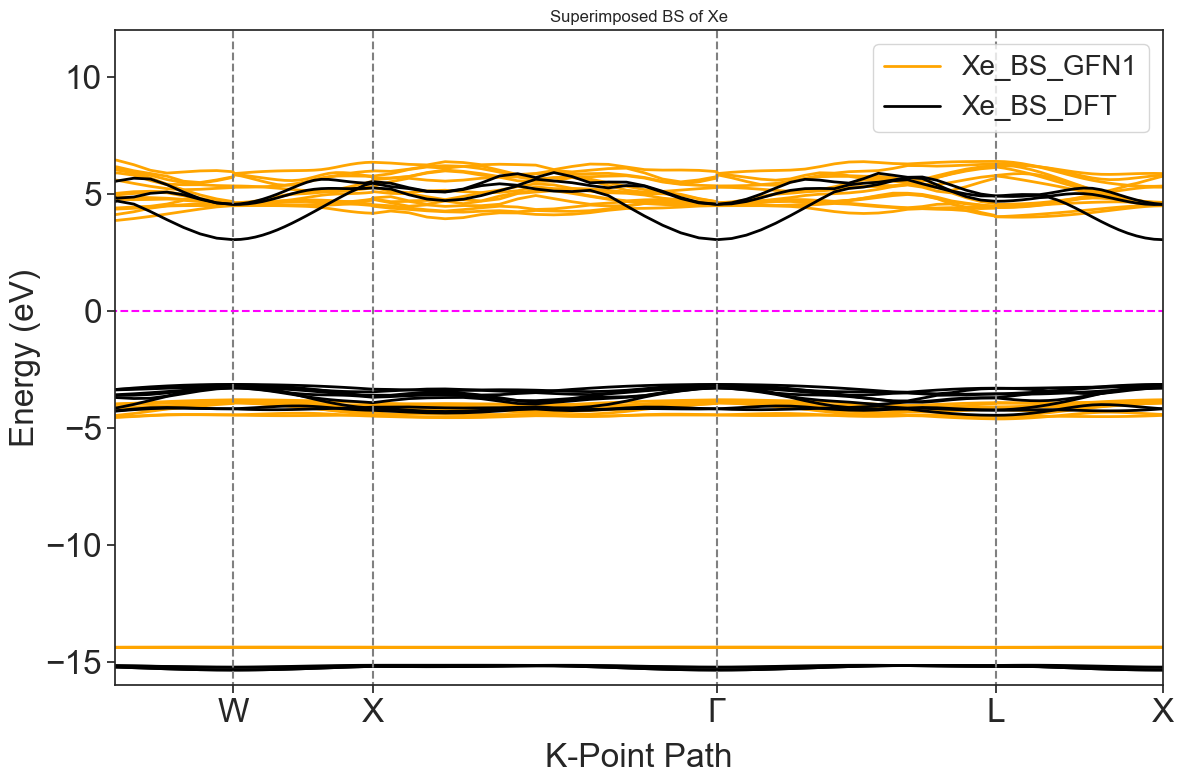

In [35]:
# Superimpose Xe Plots
fermiGFN = (-4.18-(-11.05))/2 + (-11.05)  #-7.6137 #eV 
fermiDFT = (6.17117-0.01317)/2 +(0.01317)#5.065508
# get data:
Bands_Xe_DFT = np.array(np.loadtxt("C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-20/REFORMATTED_BAND.dat")) 
KPATH_Xe_DFT = k_path_dft(KPOINTS, "C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-20/POSCAR") 
Bands_Xe_GFN1 = np.array(np.loadtxt("C:/Users/alley/Desktop/Research/Xe/5-MD/BS/bands_tot.dat")) 
KPATH_Xe_GFN1 = k_path_dft(KPOINTS, "C:/Users/alley/Desktop/Research/Xe/5-MD/BS/POSCAR") 

KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

############# v plot BS
fig3 = plt.figure(figsize=(12,8))

########### gfn-xtb
plt.title('BS of Xe (GFN1-xTB)')

# ASK MASOUMEH ABOUT THIS
#for i in range(1,len(Bands_Xe_GFN1[0,1:])):    
#    fig3 = plt.plot(Bands_Xe_GFN1[:,0], Bands_Xe_GFN1[:,i]-fermiGFN, color='b')
plt.plot(Bands_Xe_DFT[:,0], (Bands_Xe_GFN1[0:100,1])-fermiGFN, color='orange', lw=2, label='Xe_BS_GFN1') # use first column of reformatted bands to be x vals 
plt.plot(Bands_Xe_DFT[:,0], (Bands_Xe_GFN1[0:100,1:-1])-fermiGFN, color='orange', lw=2) # use first column of reformatted bands to be x vals 
kpts=[Bands_Xe_GFN1[0,0],Bands_Xe_GFN1[20,0],Bands_Xe_GFN1[40,0],Bands_Xe_GFN1[60,0],Bands_Xe_GFN1[80,0],Bands_Xe_GFN1[100,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
#plt.vlines(kpts[1:6],-18,18,color='magenta',linestyle='dashed')

############# dft
plt.plot(Bands_Xe_DFT[:,0], Bands_Xe_DFT[:,1]-fermiDFT, color='black', lw=2, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.plot(Bands_Xe_DFT[:,0], Bands_Xe_DFT[:,1:-1]-fermiDFT, color='black', lw=2) # use first column of reformatted bands to be x vals =
kpts=[Bands_Xe_DFT[0,0],Bands_Xe_DFT[19,0],Bands_Xe_DFT[39,0],Bands_Xe_DFT[59,0],Bands_Xe_DFT[79,0],Bands_Xe_DFT[99,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])

plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.hlines(0,0,80,color='magenta',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(1,Bands_Xe_DFT[-1,0])
plt.ylim(-16,12)
plt.legend()#['Xe_BS_GFN1','Xe_BS_DFT'])
plt.title('Superimposed BS of Xe')

################### v DOS plot
#plt.subplot(122)
#plt.plot(DOS_AA_DFT[:,1]/5, DOS_AA_DFT[:,0]-(BandGap_AA_DFT/2), color='purple')
#plt.text(2, -0.25, f'{COF_AA}-DFT = {BandGap_AA_DFT} eV', color='purple', fontsize=16)
#plt.xlabel('DOS', labelpad=10)
#plt.ylim(-2,2)
#plt.xlim(0,60)
#plt.hlines(ConductionBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')
#plt.hlines(ValenceBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')


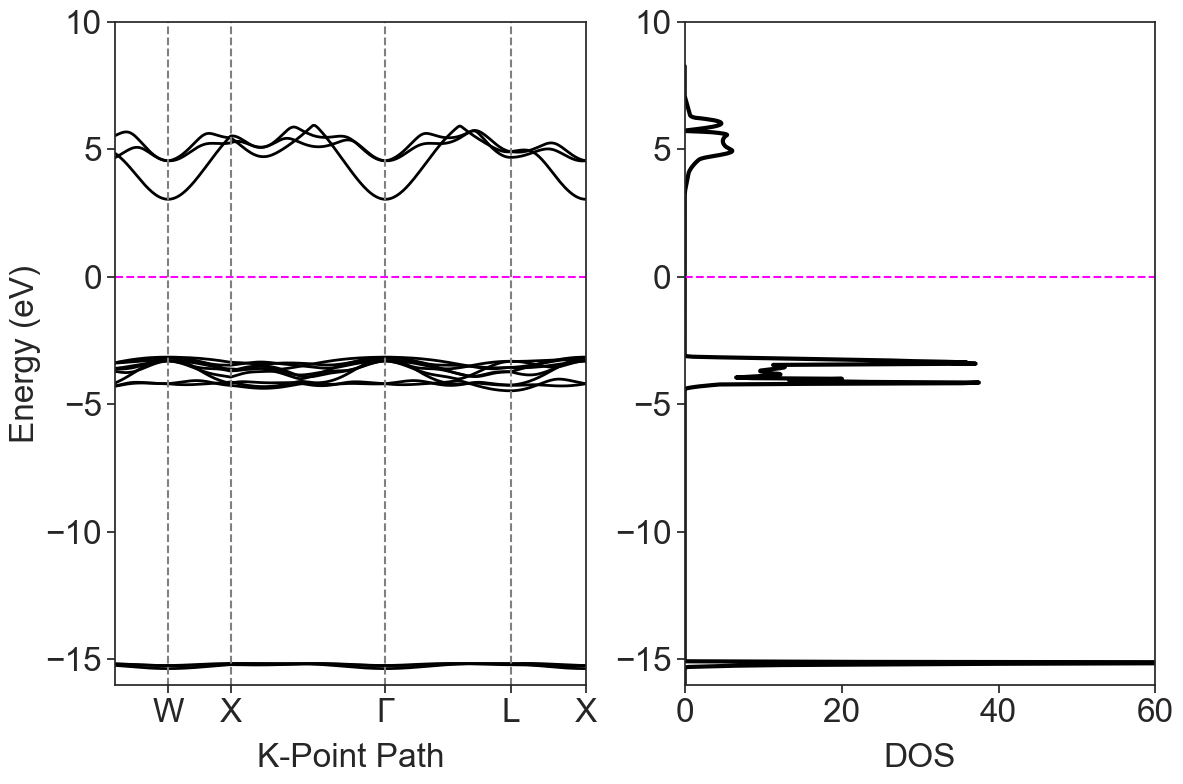

In [12]:
# plot all
# 
fermiGFN = (-4.18-(-11.05))/2 + (-11.05)  #-7.6137 #eV 
fermiDFT = (6.17117-0.01317)/2 +(0.01317)#5.065508
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

PDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/PDOS_Xe.dat'))
TDOSDFT = np.array(np.loadtxt('C:/Users/alley/Desktop/Research/Xe/3-DOS/TDOS.dat'))
Bands_Xe_DFT = np.array(np.loadtxt("C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-improved/REFORMATTED_BAND.dat")) # update this ho
KPATH_Xe_DFT = k_path_dft(KPOINTS, "C:/Users/alley/Desktop/Research/Xe/4-BS/KPTS-improved/POSCAR") # update this to be my poscar

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
#plt.title('DFT Analysis of Xenon', labelpad = 10)
plt.subplot(121)
plt.plot(Bands_Xe_DFT[:,0], Bands_Xe_DFT[:,1:-1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
kpts=[Bands_Xe_DFT[0,0],Bands_Xe_DFT[79,0],Bands_Xe_DFT[159,0],Bands_Xe_DFT[239,0],Bands_Xe_DFT[319,0],Bands_Xe_DFT[399,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(1,Bands_Xe_DFT[-1,0])
plt.ylim(-16,10)
plt.hlines(0,0,80,color='magenta',linestyle='dashed')
################### v DOS plot
plt.subplot(122)
plt.plot(TDOSDFT[:,1],TDOSDFT[:,0]-fermiDFT,  color='k',lw=3, label='Xe_Tot DFT')
#plt.plot( PDOSDFT[:,1], PDOSDFT[:,0]-fermiDFT, color='c',lw=2, label='s')
#plt.plot( PDOSDFT[:,2]+PDOSDFT[:,3]+PDOSDFT[:,4], PDOSDFT[:,0]-fermiDFT,color='m',lw=2, label='p')
#plt.legend()
#plt.text(2, -0.25, f'{COF_AA}-DFT = {BandGap_AA_DFT} eV', color='purple', fontsize=16)
plt.xlabel('DOS', labelpad=10)
plt.ylim(-16,10)
plt.xlim(0,60)
plt.hlines(0,0,80,color='magenta',linestyle='dashed')
